# Import Packages

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pylab
import numpy as np
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt

sns.set()

# Load Data

In [41]:
eq_df = pd.read_csv("earthquake data.csv")
eq_df.head()

,Date & Time,Latitude,Longitude,Depth,Magnitude,Lands,Country
0,11/21/2023 17:43,31.592,-104.549,3,2.7,WESTERN,TEXAS
1,11/21/2023 17:31,-24.200,-67.580,198,4.0,"SALTA,",ARGENTINA
2,11/21/2023 17:27,31.647,-104.017,5,2.9,WESTERN,TEXAS
3,11/21/2023 17:01,46.345,13.601,0,0.8,SLOVENIA,SLOVENIA
4,11/21/2023 16:56,-4.320,130.810,10,3.3,BANDA,SEA


# Analysing Data



1.   Describing Data
2.   Converting Date Time Column to Datetime type
3.   Setting Date Time column as index
4.   Sorting the Dataframe corresponding to Index
5.   Finding Correlation Between Numerical Columns







In [42]:
df = eq_df.copy()
df.describe()

,Latitude,Longitude,Depth,Magnitude
count,53539.000000,53539.000000,53539.000000,53539.000000
mean,21.120630,-15.421862,35.799959,2.962569
std,25.645429,93.129891,67.580186,0.893910
min,-65.899000,-179.992000,-4.000000,-0.700000
25%,8.485000,-94.570000,6.000000,2.300000
50%,29.320000,-8.373000,10.000000,2.900000
75%,38.470000,37.460000,32.000000,3.500000
max,85.330000,180.000000,750.000000,7.700000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53539 entries, 0 to 53538
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date & Time  53539 non-null  object 
 1   Latitude     53539 non-null  float64
 2   Longitude    53539 non-null  float64
 3   Depth        53539 non-null  int64  
 4   Magnitude    53539 non-null  float64
 5   Lands        53539 non-null  object 
 6   Country      53539 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.9+ MB


In [44]:
df["Date & Time"] = pd.to_datetime(df["Date & Time"], dayfirst=True)

C:\Users\ujjwal singhi\AppData\Local\Temp\ipykernel_4036\4228785879.py:1: UserWarning: Parsing dates in %m/%d/%Y %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["Date & Time"] = pd.to_datetime(df["Date & Time"], dayfirst=True)


In [45]:
df["Date & Time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 53539 entries, 0 to 53538
Series name: Date & Time
Non-Null Count  Dtype         
--------------  -----         
53539 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 418.4 KB


In [46]:
df.head()

,Date & Time,Latitude,Longitude,Depth,Magnitude,Lands,Country
0,2023-11-21 17:43:00,31.592,-104.549,3,2.7,WESTERN,TEXAS
1,2023-11-21 17:31:00,-24.200,-67.580,198,4.0,"SALTA,",ARGENTINA
2,2023-11-21 17:27:00,31.647,-104.017,5,2.9,WESTERN,TEXAS
3,2023-11-21 17:01:00,46.345,13.601,0,0.8,SLOVENIA,SLOVENIA
4,2023-11-21 16:56:00,-4.320,130.810,10,3.3,BANDA,SEA


In [47]:
df["Date & Time"].describe()

count                            53539
mean     2023-08-18 16:51:06.049421824
min                2023-05-14 09:27:00
25%                2023-07-02 17:10:30
50%                2023-08-19 17:53:00
75%                2023-10-05 00:01:30
max                2023-11-21 17:43:00
Name: Date & Time, dtype: object

In [48]:
df.set_index('Date & Time', inplace=True)
df.head()

,Latitude,Longitude,Depth,Magnitude,Lands,Country
Date & Time,,,,,,
2023-11-21 17:43:00,31.592,-104.549,3,2.7,WESTERN,TEXAS
2023-11-21 17:31:00,-24.200,-67.580,198,4.0,"SALTA,",ARGENTINA
2023-11-21 17:27:00,31.647,-104.017,5,2.9,WESTERN,TEXAS
2023-11-21 17:01:00,46.345,13.601,0,0.8,SLOVENIA,SLOVENIA
2023-11-21 16:56:00,-4.320,130.810,10,3.3,BANDA,SEA


In [49]:
df.select_dtypes(include=[np.number]).corr()

,Latitude,Longitude,Depth,Magnitude
Latitude,1.000000,-0.136270,-0.393834,-0.428230
Longitude,-0.136270,1.000000,0.008043,0.130760
Depth,-0.393834,0.008043,1.000000,0.299489
Magnitude,-0.428230,0.130760,0.299489,1.000000


**Latitude and Longitude:** A weak negative correlation (-0.136), which means there is a slight tendency for one to decrease as the other increases (and vice versa).

**Latitude and Depth:** A moderate negative correlation (-0.394), suggesting that there is a somewhat stronger tendency for one to decrease as the other increases (and vice versa).

**Latitude and Magnitude:** A moderate negative correlation (-0.428), indicating a moderate tendency for one to decrease as the other increases (and vice versa).

**Longitude and Depth:** A very weak positive correlation (0.008), suggesting a weak tendency for one to increase as the other increases (and vice versa).

**Longitude and Magnitude:** A weak positive correlation (0.131), indicating a slight tendency for one to increase as the other increases (and vice versa).

**Depth and Magnitude:** A moderate positive correlation (0.299), suggesting a moderate tendency for one to increase as the other increases (and vice versa).

In [50]:
df_sort = df.sort_index()


In [51]:
dfcopy = df_sort.copy()

# Exploratory Data Analysis

### Land and Country Analysis:

1.   Which lands or countries experience the most earthquakes?
2.   Are there specific regions that are more prone to seismic events?




In [52]:
dfcopy.head()

,Latitude,Longitude,Depth,Magnitude,Lands,Country
Date & Time,,,,,,
2023-05-14 09:27:00,-23.97,-67.46,240,3.7,"ANTOFAGASTA,",CHILE
2023-05-14 09:28:00,15.89,-93.52,106,3.9,"CHIAPAS,",MEXICO
2023-05-14 09:48:00,19.40,-155.24,2,2.2,"ISLAND, OF, HAWAII,",HAWAII
2023-05-14 09:49:00,11.52,141.62,10,5.1,"STATE, OF, YAP,",MICRONESIA
2023-05-14 09:50:00,18.08,-103.27,7,3.5,"OFFSHORE, MICHOACAN,",MEXICO


#### Which lands or countries experience the most earthquakes?

In [56]:

# Count the occurrences of each location
location_counts = pd.Series(dfcopy['Lands'] + ' ' + dfcopy['Country']).value_counts()

# Top N locations with the most earthquakes
top_n = 10
top_locations = location_counts.head(top_n)
top_locations

CENTRAL TURKEY                3300
ISLAND, OF, HAWAII, HAWAII    1661
EASTERN TURKEY                1486
WESTERN TEXAS                 1171
GREECE GREECE                 1105
OAXACA, MEXICO                1010
ANTOFAGASTA, CHILE             935
WESTERN TURKEY                 852
PUERTO, RICO REGION            831
ICELAND REGION                 773
Name: count, dtype: int64

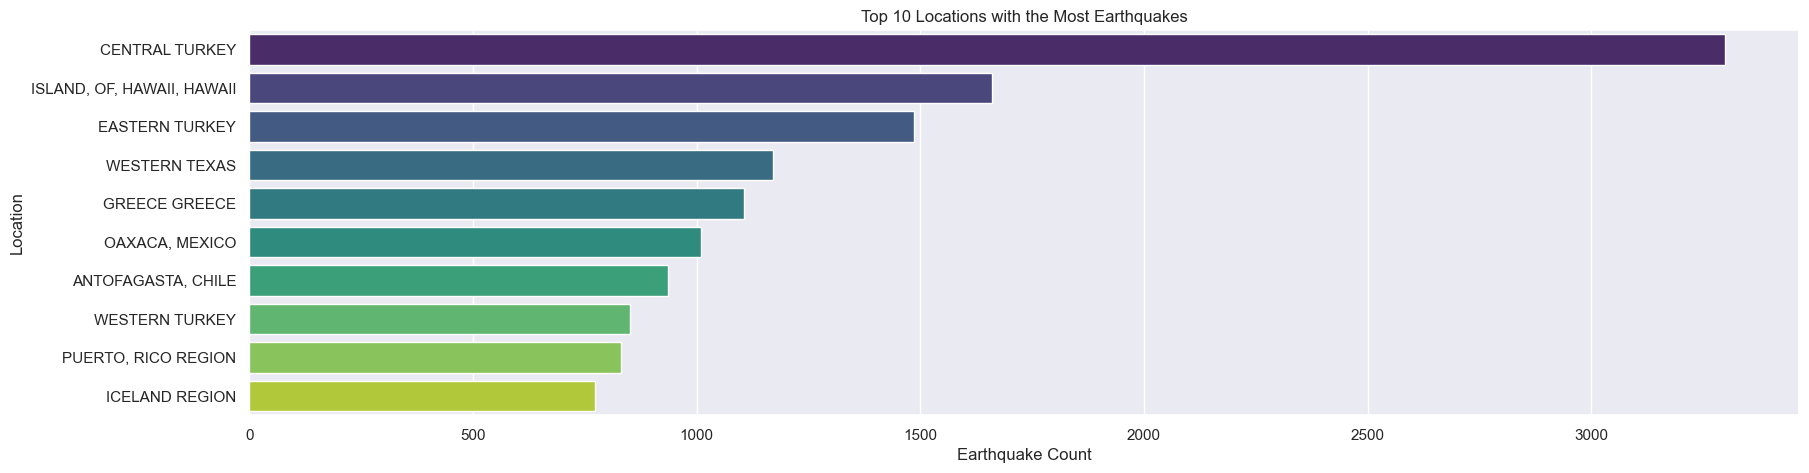

In [59]:
plt.figure(figsize=(20, 5))
sns.barplot(x=top_locations, y=top_locations.index, palette='viridis')
plt.title(f'Top {top_n} Locations with the Most Earthquakes')
plt.xlabel('Earthquake Count')
plt.ylabel('Location')
plt.show()

#### Are there specific regions that are more prone to seismic events?


['TURKEY']


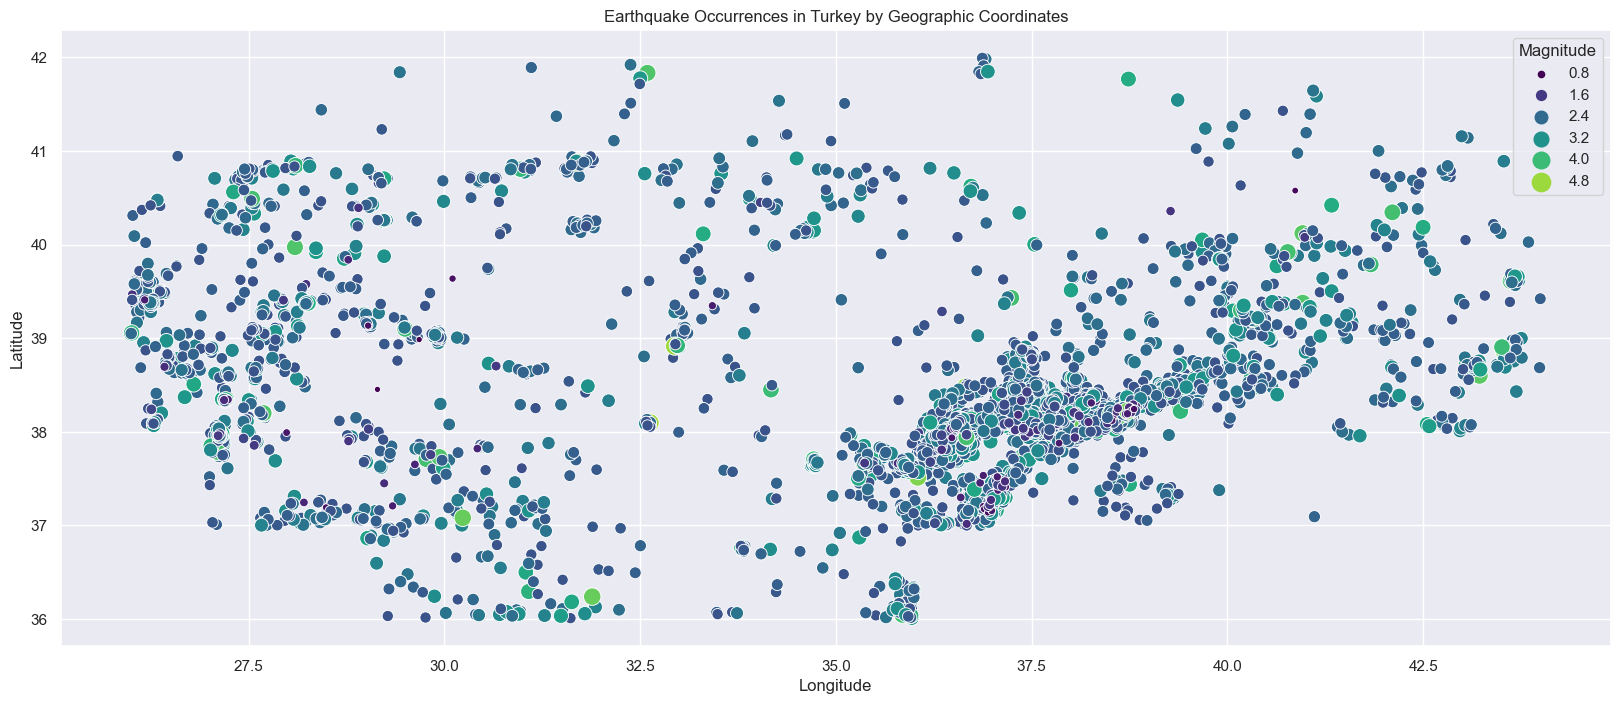

In [60]:
dfcopy['Country'] = dfcopy['Country'].str.strip()  # Remove leading/trailing whitespaces
turkey_data = dfcopy[dfcopy['Country'].str.lower() == 'turkey']  # Case-insensitive match

# Check unique values in the 'Country' column
print(turkey_data['Country'].unique())

plt.figure(figsize=(20, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=turkey_data, hue='Magnitude', palette='viridis', size='Magnitude', sizes=(20, 200))
plt.title('Earthquake Occurrences in Turkey by Geographic Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Magnitude')
plt.show()

### Temporal Patterns:


1.   How does the frequency of earthquakes vary over time?
2.   Are there specific days, months, or seasons with higher seismic activity?




#### How does the frequency of earthquakes vary over time?

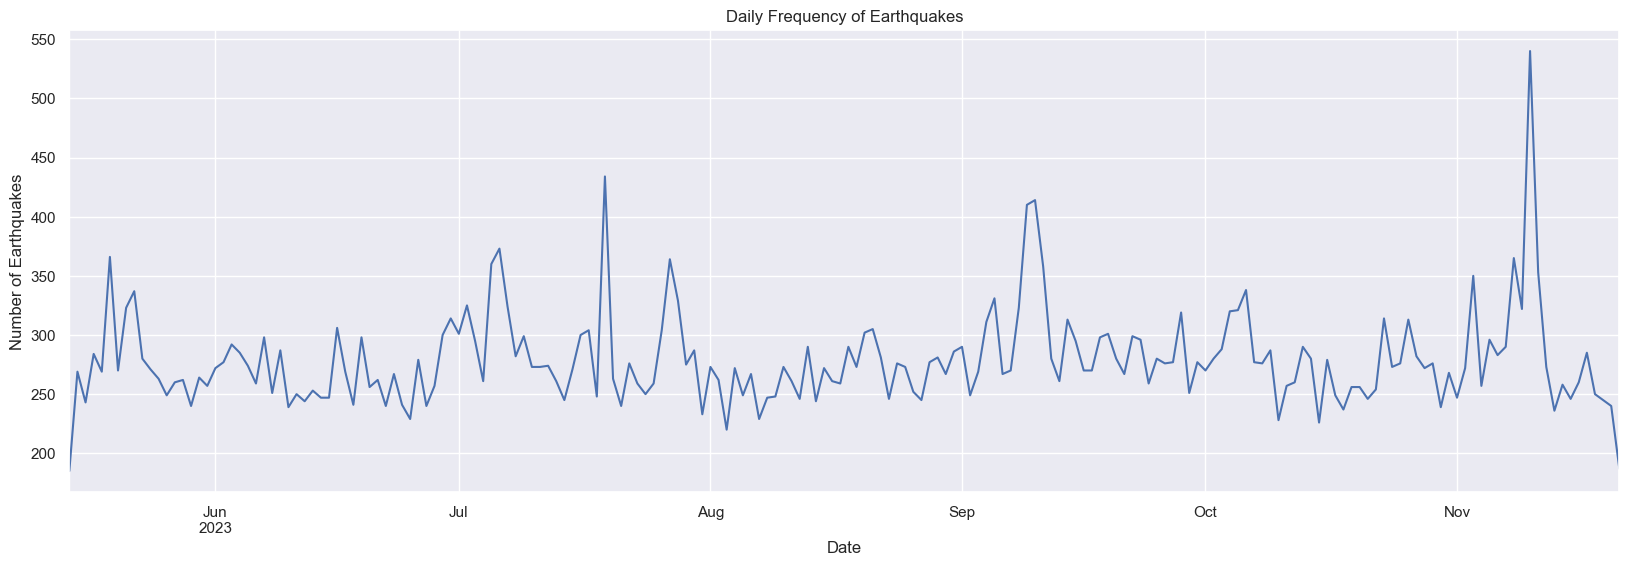

In [22]:
daily_counts = dfcopy.resample('D').size()

plt.figure(figsize=(20, 6))
daily_counts.plot(title='Daily Frequency of Earthquakes', xlabel='Date', ylabel='Number of Earthquakes')
plt.show()

#### Are there specific days, months, or seasons with higher seismic activity?

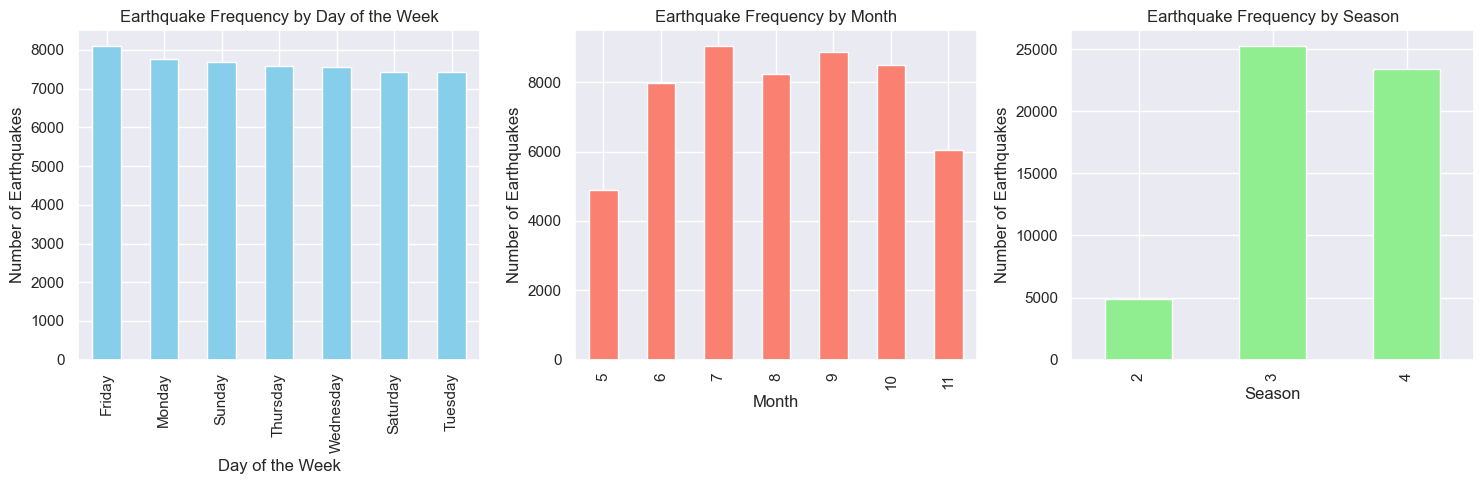

In [23]:
dfcopy['Day of Week'] = dfcopy.index.day_name()
dfcopy['Month'] = dfcopy.index.month
dfcopy['Season'] = (dfcopy.index.month % 12 + 3) // 3  # Calculating season based on month

# Count the occurrences for each day of the week, month, and season
day_of_week_counts = dfcopy['Day of Week'].value_counts()
month_counts = dfcopy['Month'].value_counts()
season_counts = dfcopy['Season'].value_counts()

# Plot the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.title('Earthquake Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Earthquakes')

plt.subplot(1, 3, 2)
month_counts.sort_index().plot(kind='bar', color='salmon')
plt.title('Earthquake Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')

plt.subplot(1, 3, 3)
season_counts.sort_index().plot(kind='bar', color='lightgreen')
plt.title('Earthquake Frequency by Season')
plt.xlabel('Season')
plt.ylabel('Number of Earthquakes')

plt.tight_layout()
plt.show()

March, April, May => Season 1 (Spring)

June, July, August => Season 2 (Summer)

September, October, November => Season 3 (Autumn)

December, January, February => Season 4 (Winter)

Corresponding to provided data most of the Earthquakes occures in Season 3 (Autumn) and monthly wise in July and daily wise on Friday.



### Magnitude Analysis:


1.   What is the distribution of earthquake magnitudes in the dataset?
2.   Identify any outliers or extreme magnitude events?

#### What is the distribution of earthquake magnitudes in the dataset?

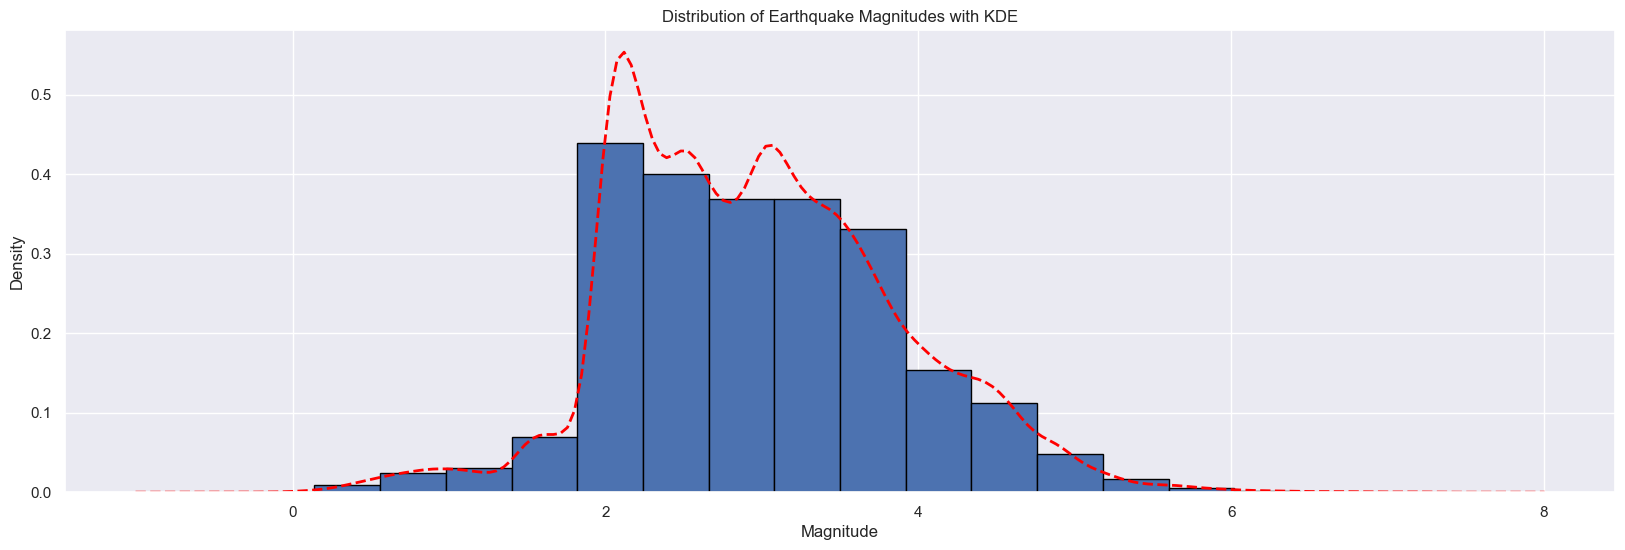

In [24]:
plt.figure(figsize=(20, 6))

plt.hist(dfcopy['Magnitude'], bins=20, edgecolor='black', density=True)

# KDE line
sns.kdeplot(dfcopy['Magnitude'], color='red', linestyle='dashed', linewidth=2)

plt.title('Distribution of Earthquake Magnitudes with KDE')
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.show()

#### Identify any outliers or extreme magnitude events?

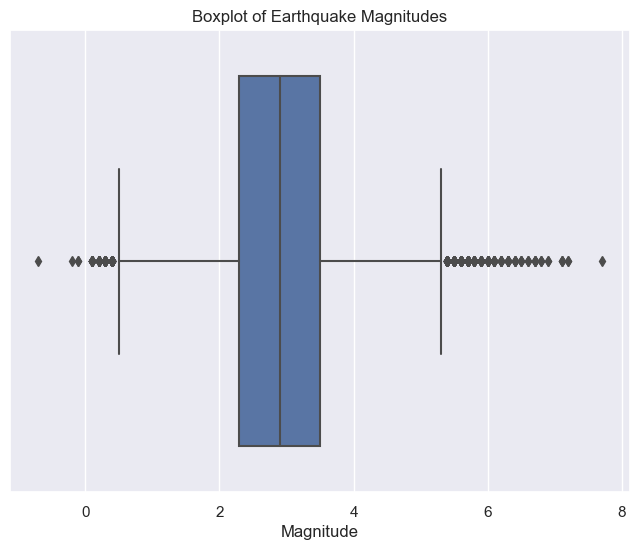

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dfcopy['Magnitude'])
plt.title('Boxplot of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.show()